In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/content/temperature_data (3).csv')
df

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

In [3]:
df.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [4]:
df.tail()

ambient   coolant       u_d       u_q  motor_speed   torque  \
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.25564   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.25564   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.25564   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.25564   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.25564   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72

In [5]:
# Basic information about the dataset
df.info()
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


**Data Analysis**

In [8]:
df.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

In [9]:
df.shape

(998070, 13)

In [10]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

Missing values in the dataset Cheking.

In [12]:
# df.isnull().sum()
print("Missing values:\n", df.isnull().sum())

Missing values:
 ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64


<Axes: xlabel='profile_id'>

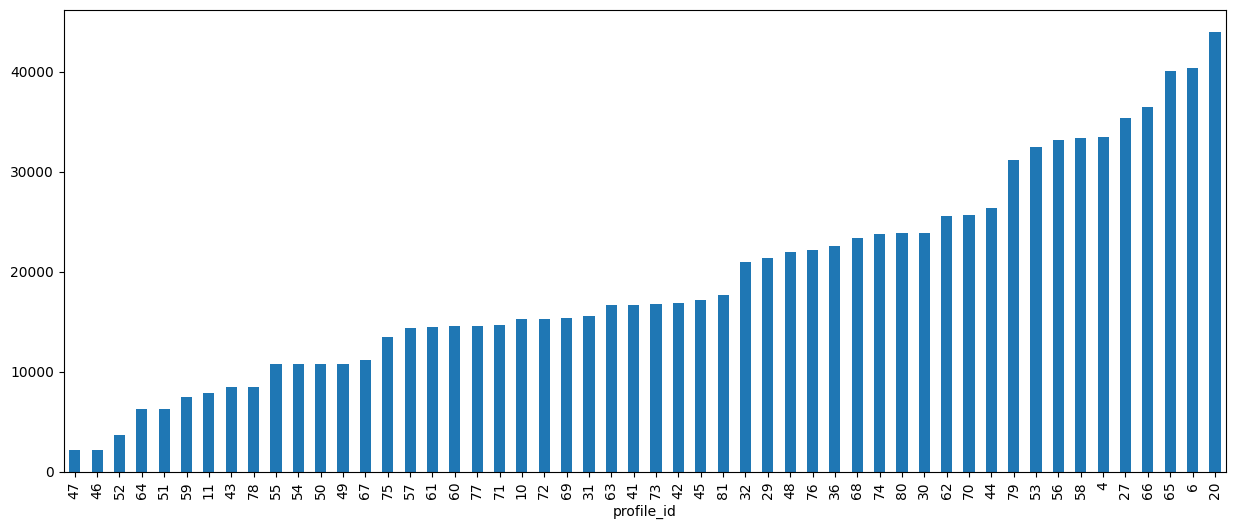

In [13]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

In [14]:
#Statistical Summary
# Calculate central tendency and dispersion for each variable
central_tendency = df.describe().loc[['mean', '50%']]  # '50%' is the median
dispersion = df.describe().loc[['std', '25%', '75%']]  # 'std' is standard deviation, '25%' & '75%' are quartiles

# Combine the two to create a more comprehensive summary
stat_summary = pd.concat([central_tendency, dispersion])

# Display the summary
print("Statistical Summary (Central Tendency & Dispersion):\n")
print(stat_summary)

Statistical Summary (Central Tendency & Dispersion):

       ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
mean -0.003905  0.004723  0.004780 -0.005690    -0.006336 -0.003333  0.006043   
50%   0.266157 -0.177187  0.267542 -0.099818    -0.140246 -0.187246  0.213935   
std   0.993127  1.002423  0.997878  1.002330     1.001229  0.997907  0.998994   
25%  -0.599385 -1.037925 -0.826359 -0.927390    -0.951892 -0.266917 -0.756296   
75%   0.686675  0.650709  0.358491  0.852625     0.853584  0.547171  1.013975   

           i_q        pm  stator_yoke  stator_tooth  stator_winding  \
mean -0.003194 -0.004396     0.000609     -0.002208       -0.003935   
50%  -0.190076  0.094367    -0.057226      0.005085        0.006536   
std   0.997912  0.995686     1.001049      0.999597        0.998343   
25%  -0.257269 -0.672308    -0.747265     -0.761951       -0.725622   
75%   0.499260  0.680691     0.697344      0.772239        0.725660   

      profile_id  
mean   50.732

In [15]:
# As profile_id is an id for each measurement session, therefore we remove it from any furthur analysis and model building.
df.drop('profile_id', axis=1, inplace=True)


In [16]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding'],
      dtype='object')

In [18]:
# Initialize empty lists
numerical_cols = []
categorical_cols = []

In [19]:
# Loop through each column to check its type
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns (string/text)
        categorical_cols.append(col)
    else:  # Numerical columns (integers & floats)
        numerical_cols.append(col)

# Print results
print("Numerical Columns:", numerical_cols)
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d', 'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding']

Categorical Columns: []


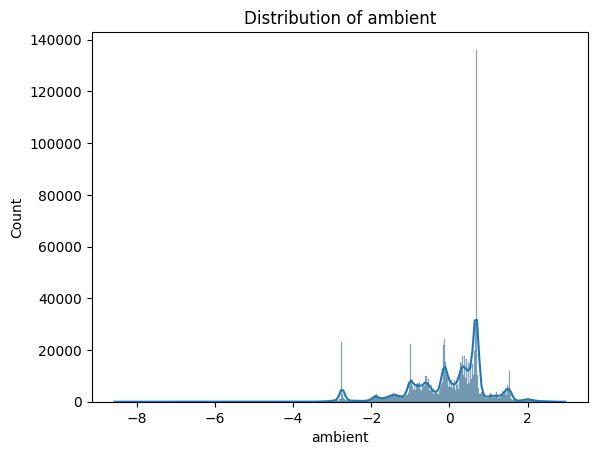

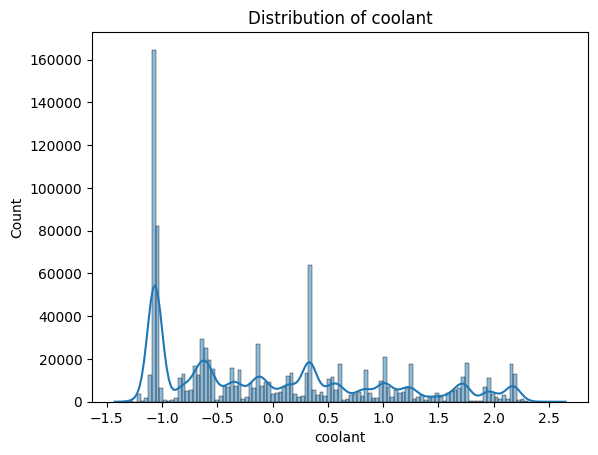

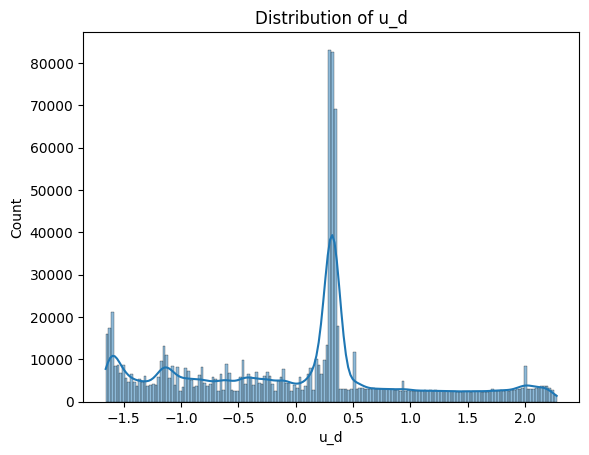

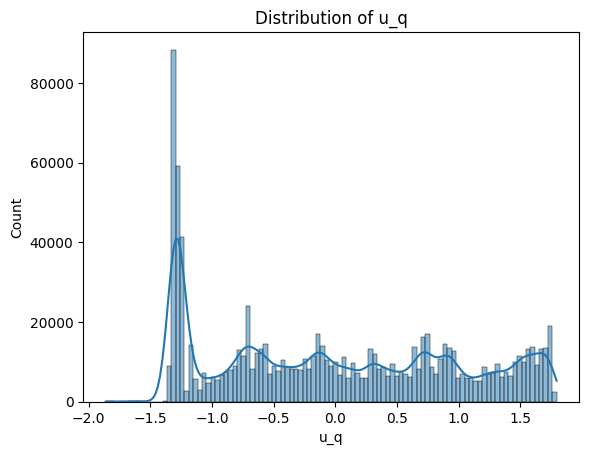

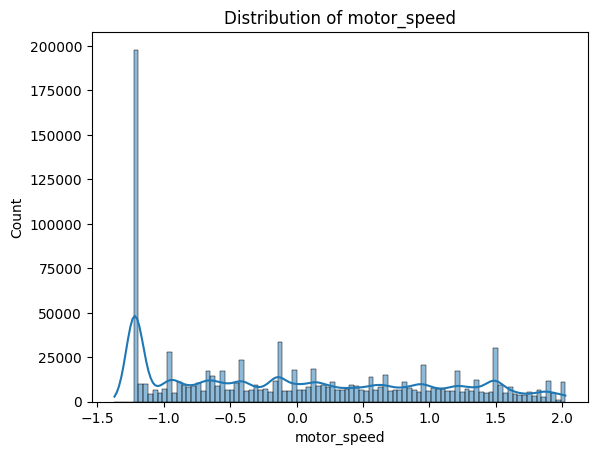

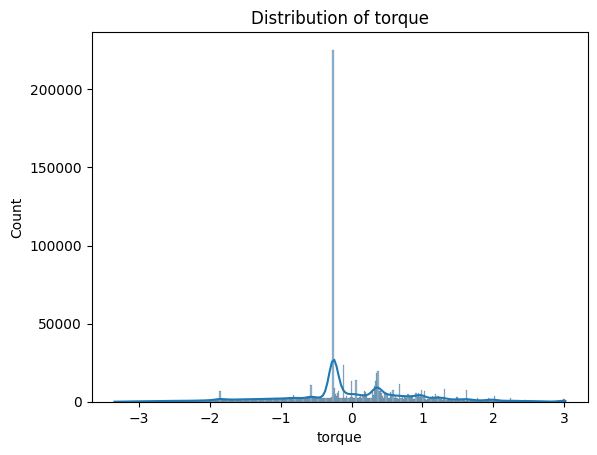

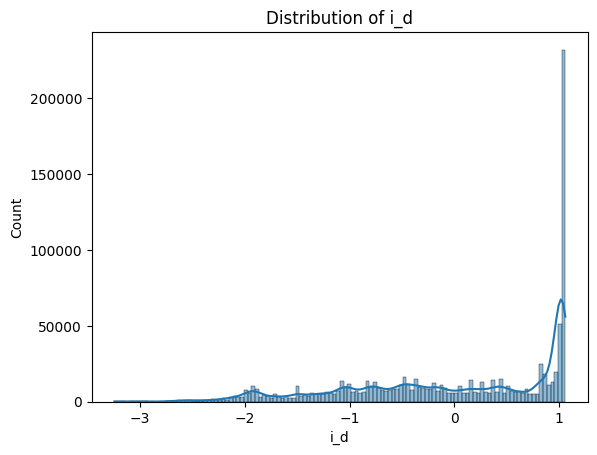

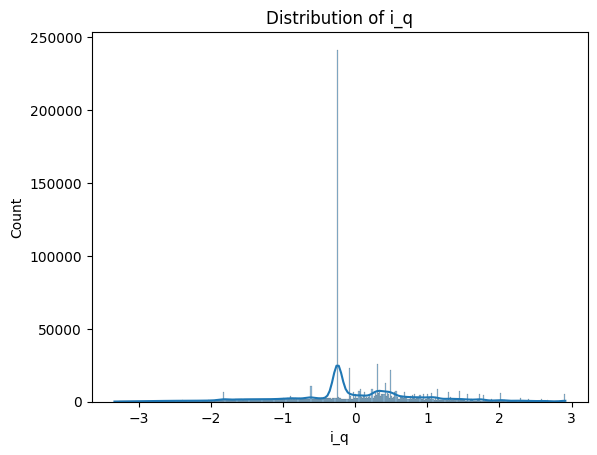

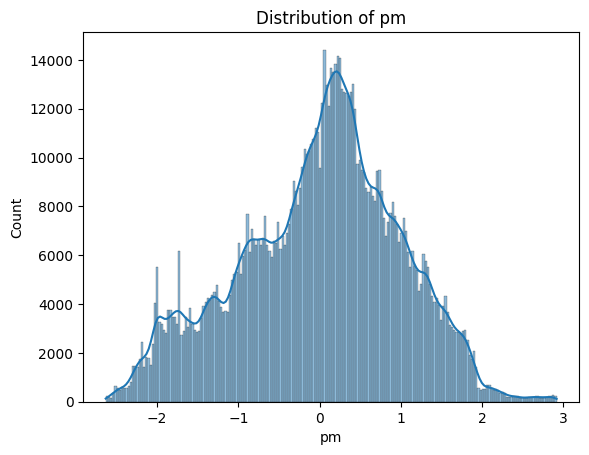

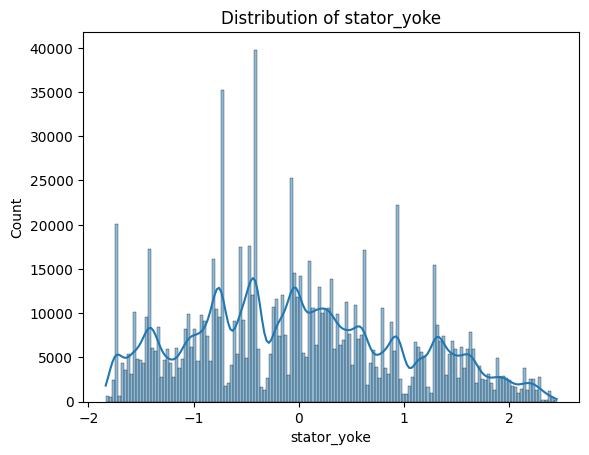

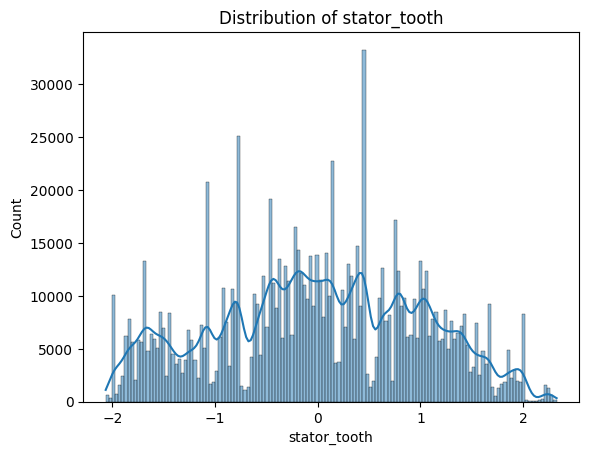

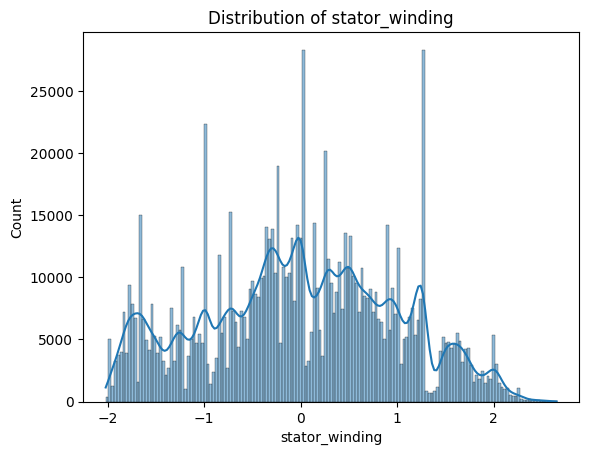

In [20]:
#Histogram
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

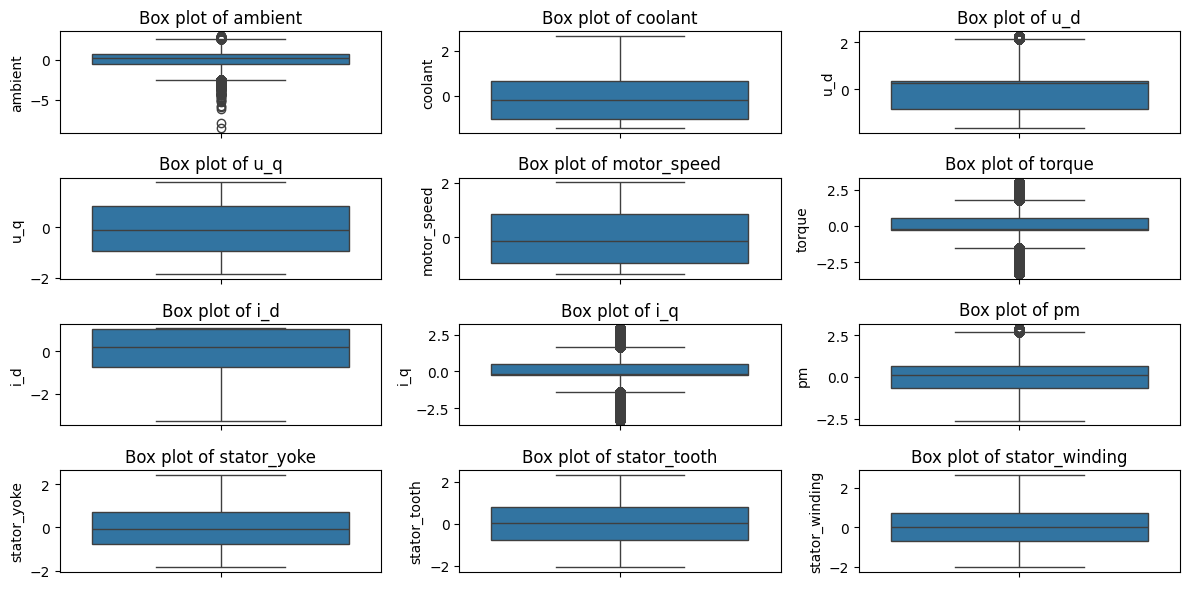

In [21]:
# Box plots
plt.figure(figsize=(12, 6))
num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Use calculated num_rows
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

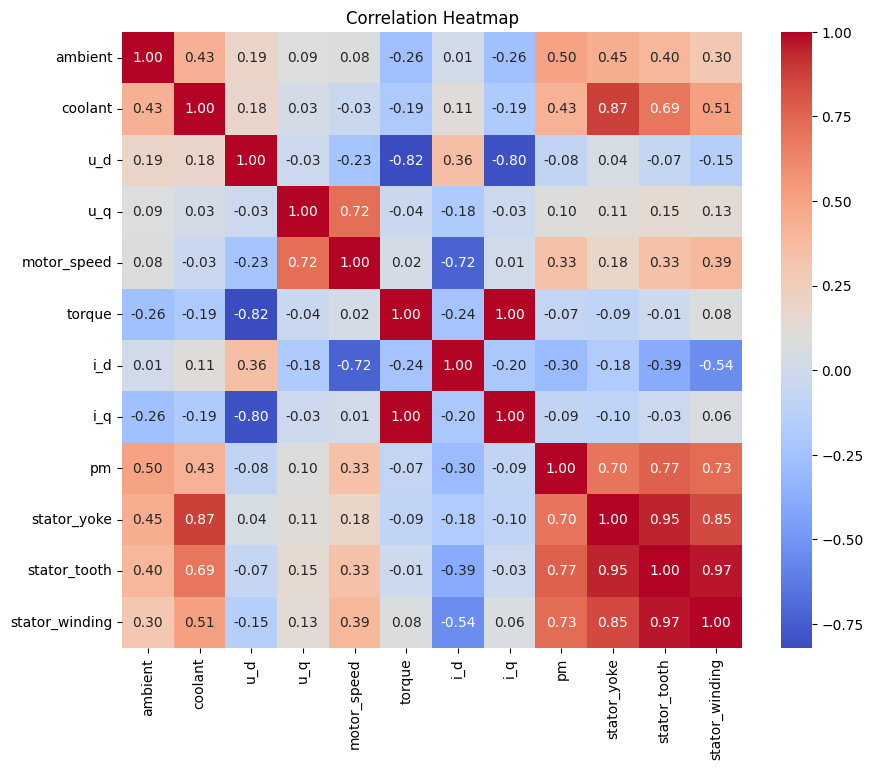

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


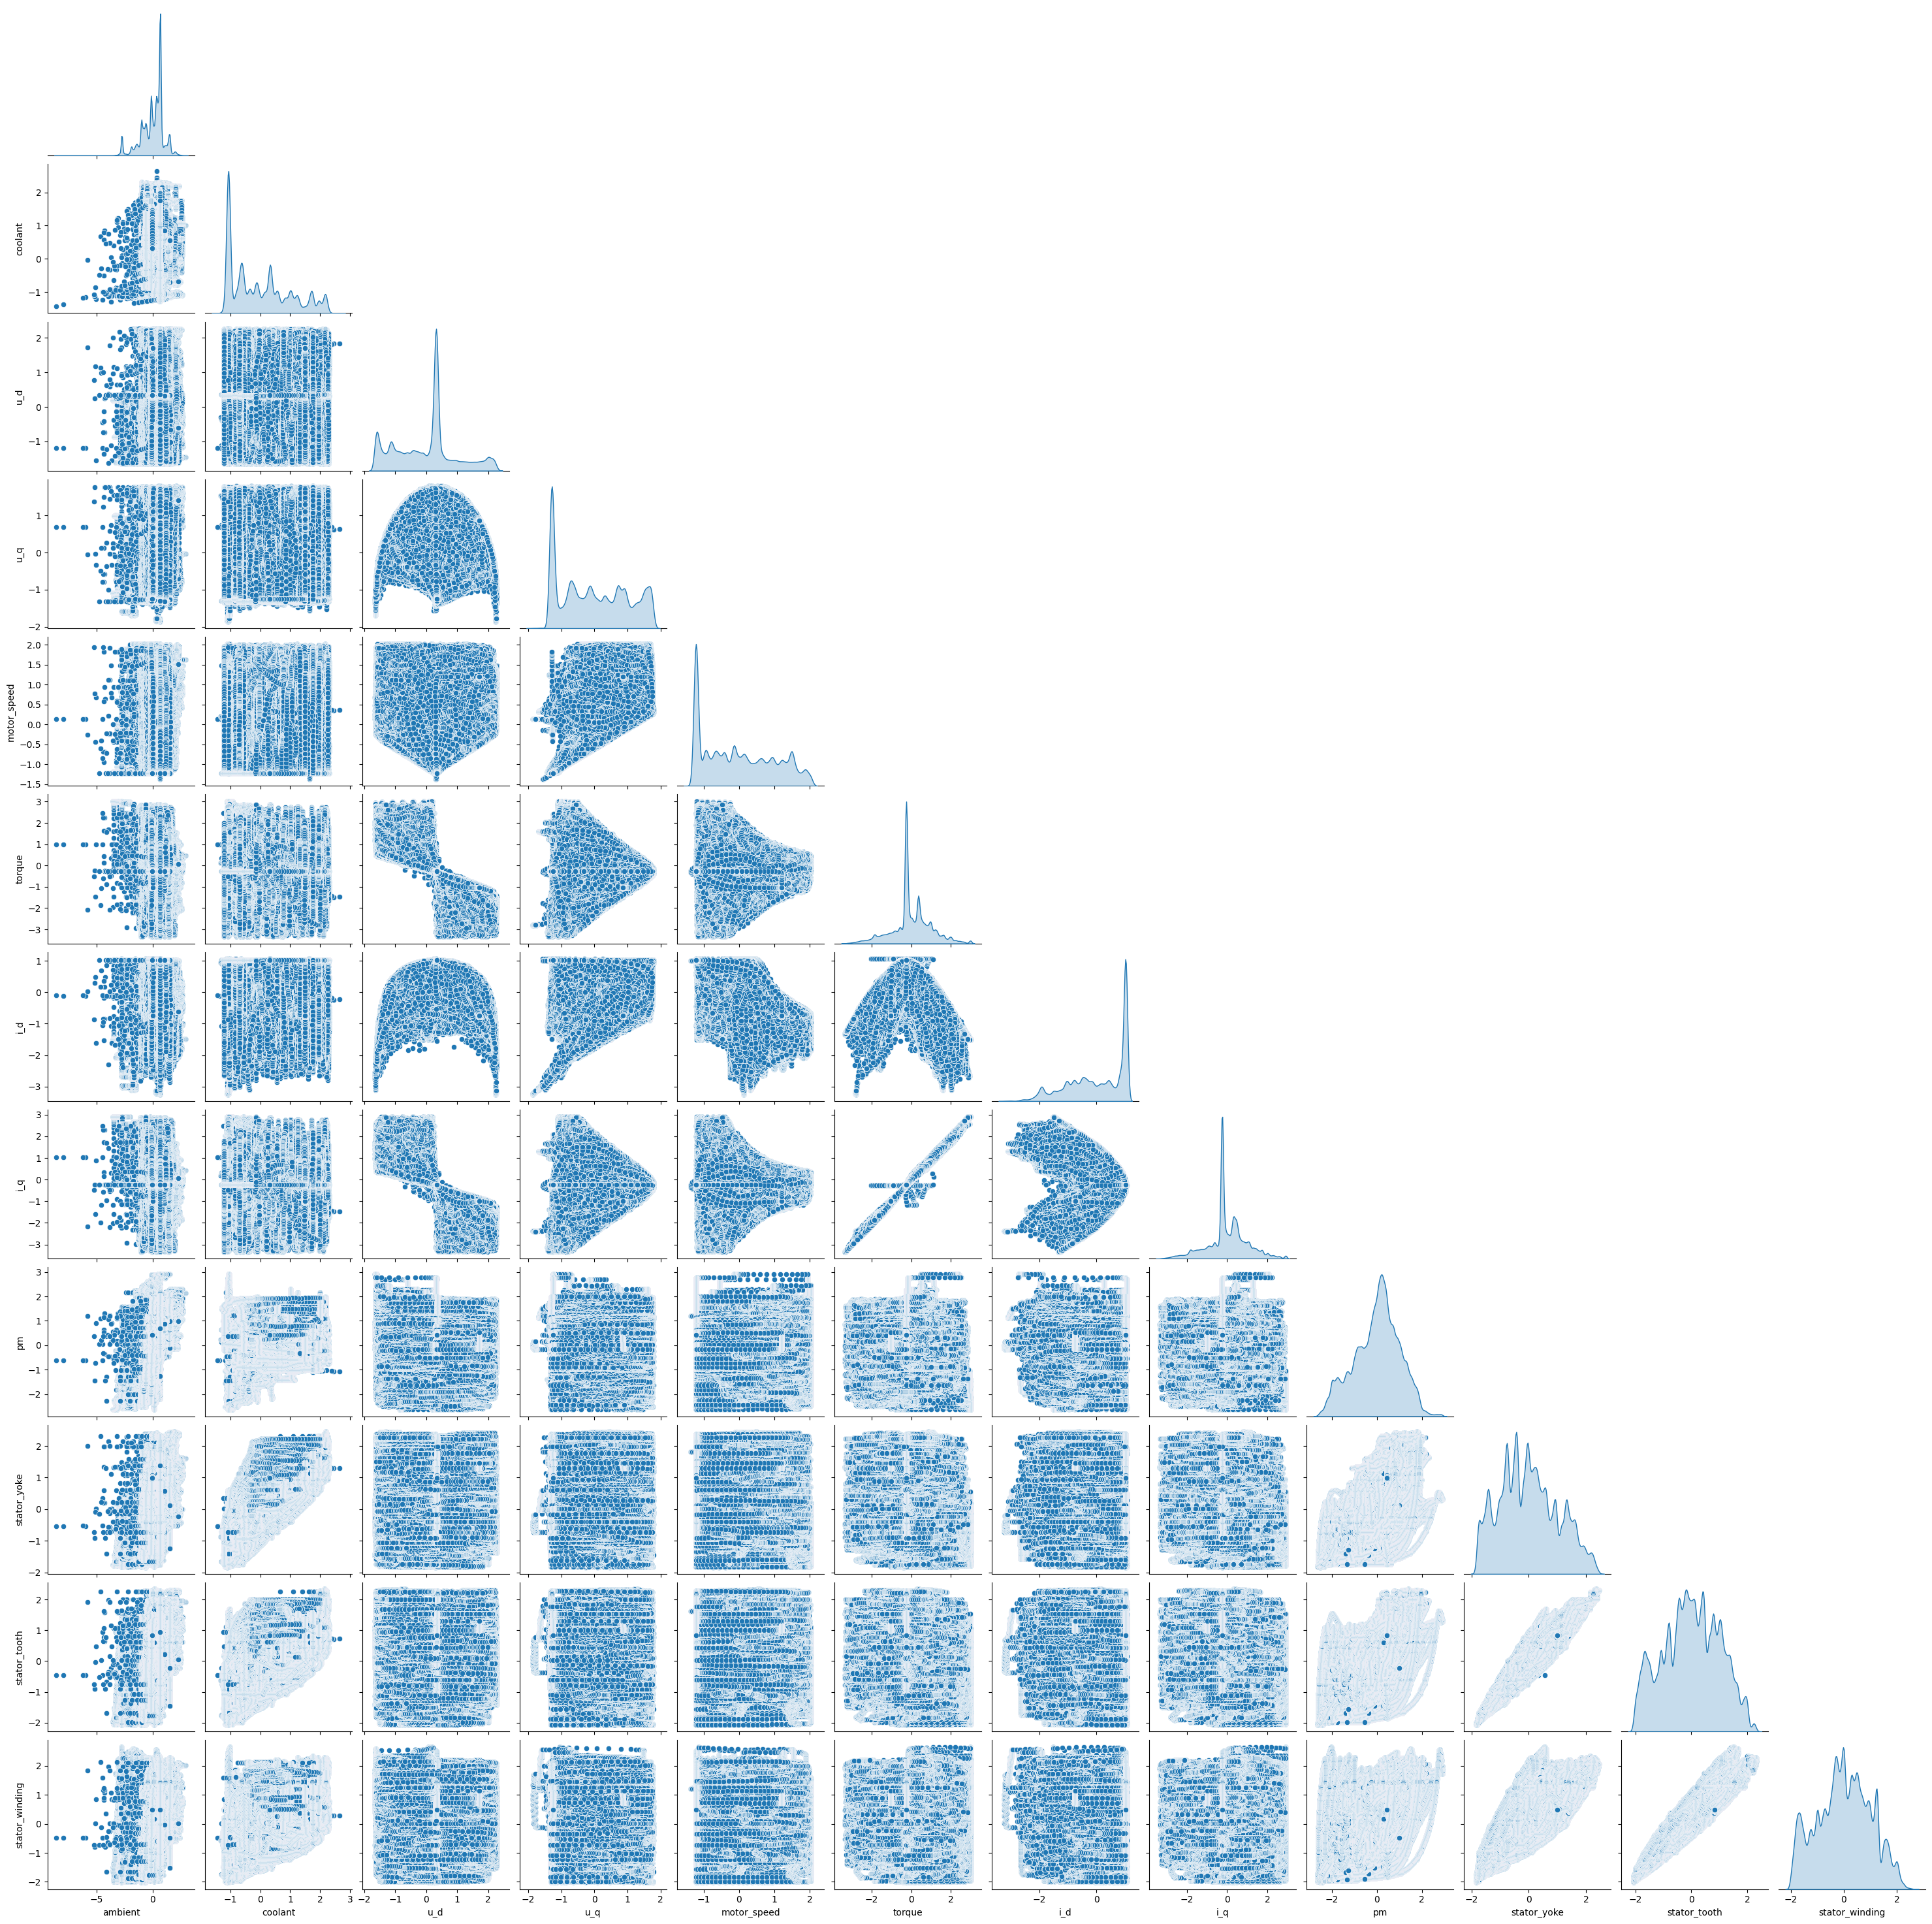

In [23]:
# Pairplot
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

<ipython-input-24-7d4b435811e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['motor_speed'], y=df[column], palette="coolwarm")
<ipython-input-24-7d4b435811e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['motor_speed'], y=df[column], palette="coolwarm")
<ipython-input-24-7d4b435811e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['motor_speed'], y=df[column], palette="coolwarm")


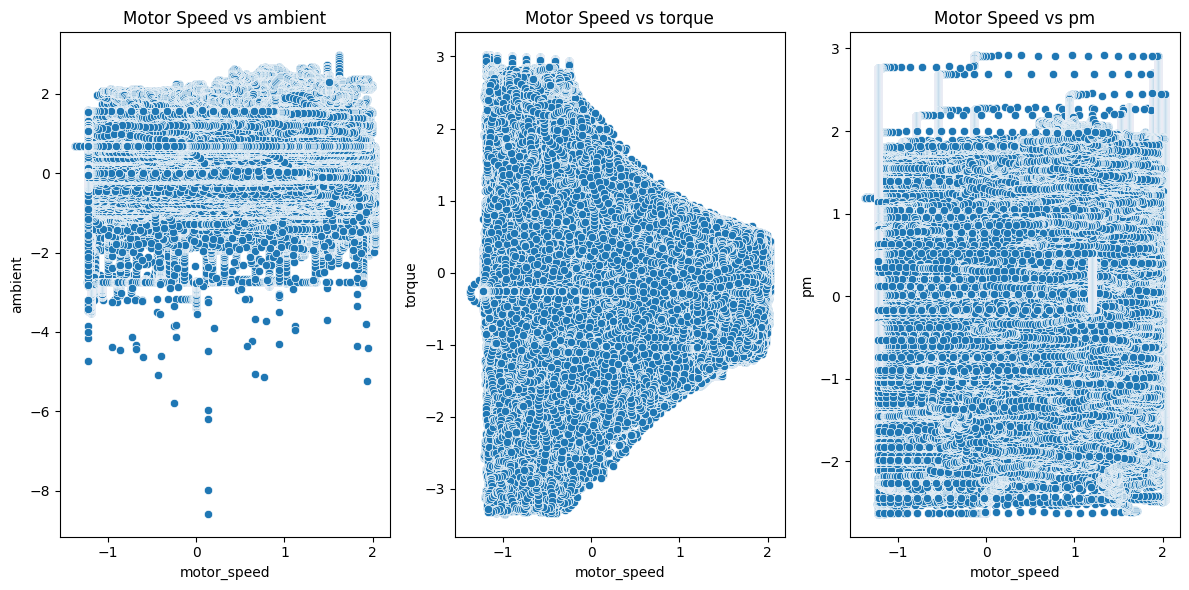

In [24]:
# Scatter plots for bivariate relationships
plt.figure(figsize=(12, 6))
for i, column in enumerate(['ambient', 'torque', 'pm']):
    if column in df.columns:
        plt.subplot(1, 3, i + 1)
        sns.scatterplot(x=df['motor_speed'], y=df[column], palette="coolwarm")
        plt.title(f'Motor Speed vs {column}')
plt.tight_layout()
plt.show()


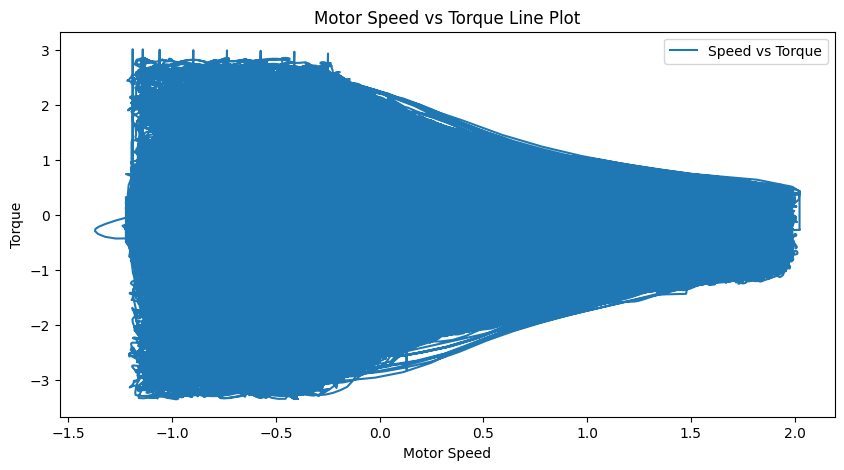

In [26]:
# Line Plot
plt.figure(figsize=(10, 5))
if 'motor_speed' in df.columns and 'torque' in df.columns:
    plt.plot(df['motor_speed'], df['torque'], label='Speed vs Torque')
    plt.xlabel('Motor Speed')
    plt.ylabel('Torque')
    plt.title('Motor Speed vs Torque Line Plot')
    plt.legend()
    plt.show()


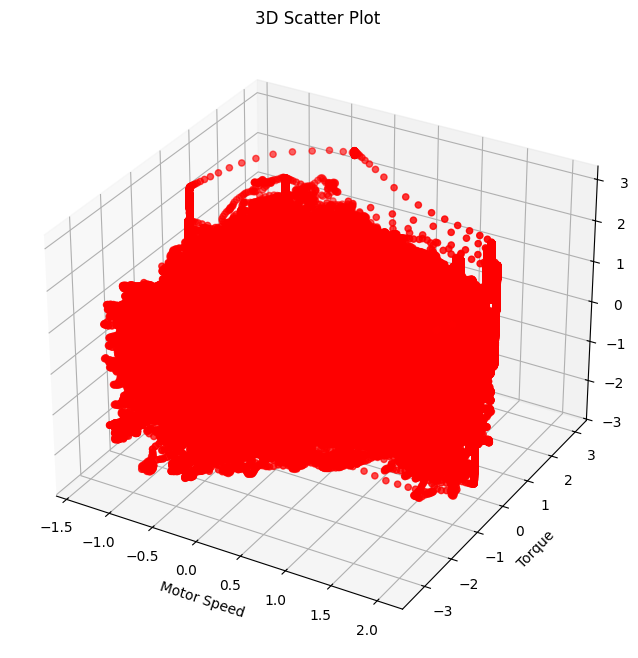

In [27]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
if {'motor_speed', 'torque', 'pm'}.issubset(df.columns):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['motor_speed'], df['torque'], df['pm'], c='r', marker='o')
    ax.set_xlabel('Motor Speed')
    ax.set_ylabel('Torque')
    ax.set_zlabel('PM Temp')
    plt.title('3D Scatter Plot')
    plt.show()


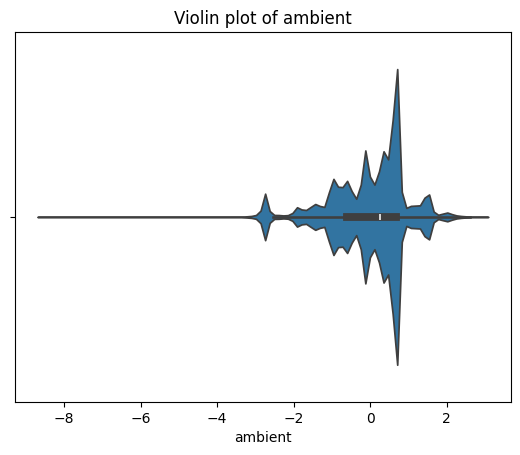

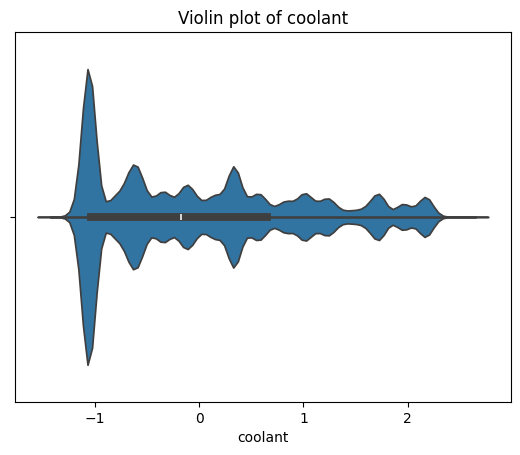

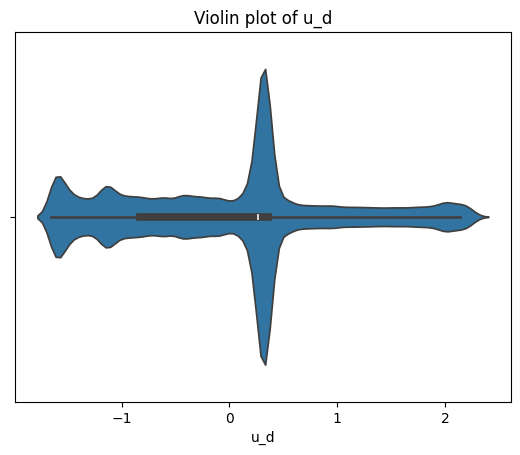

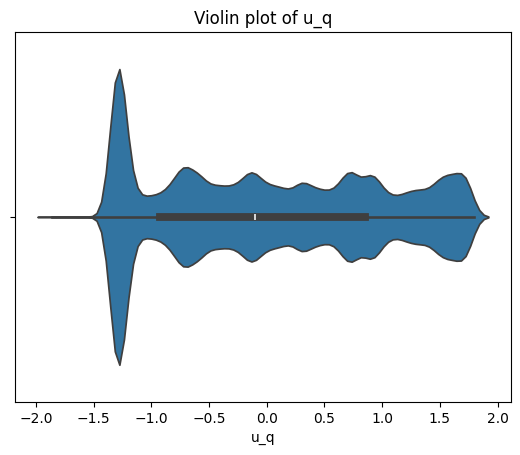

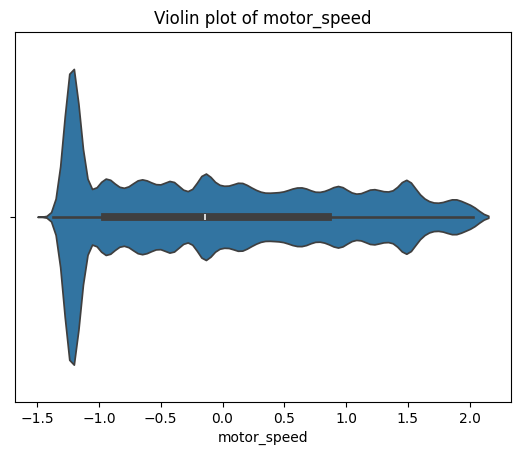

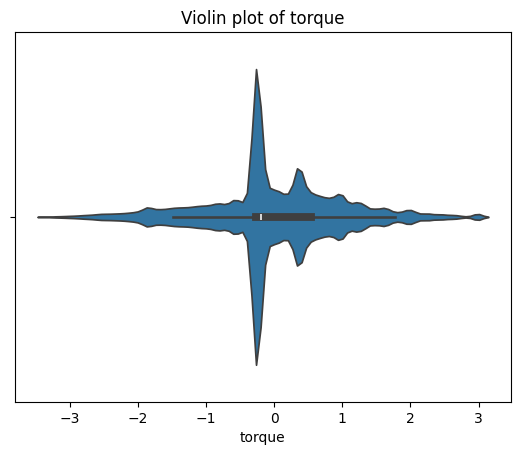

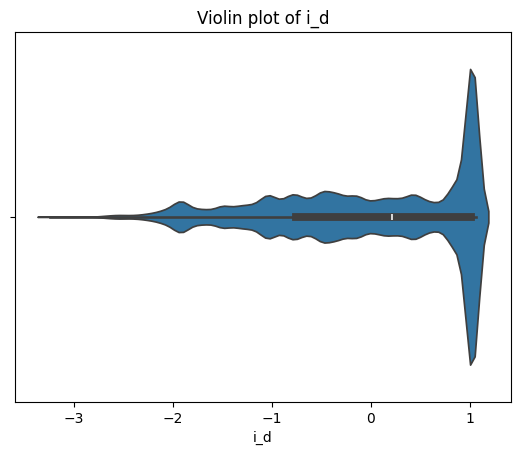

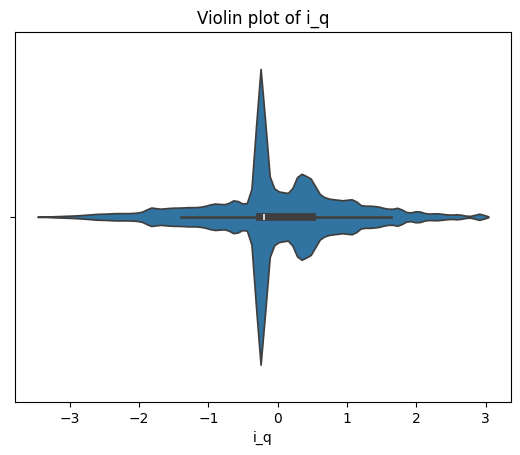

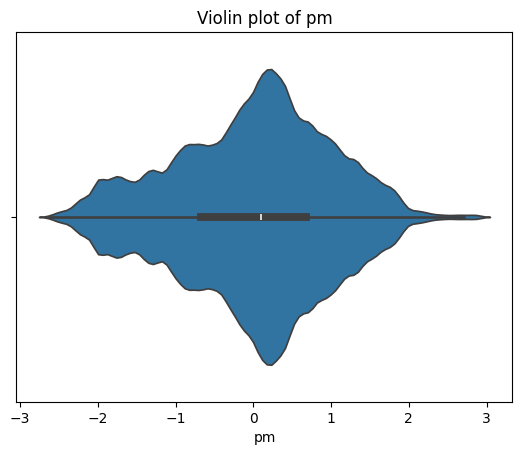

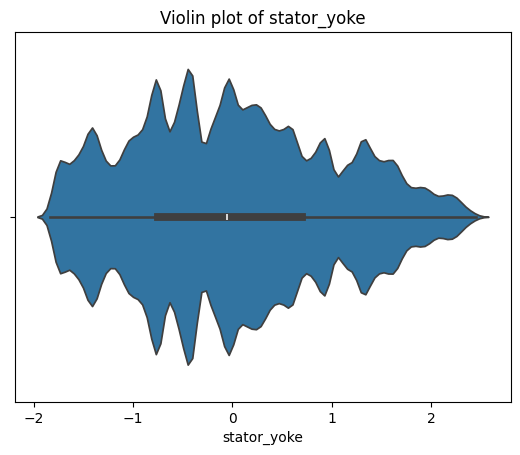

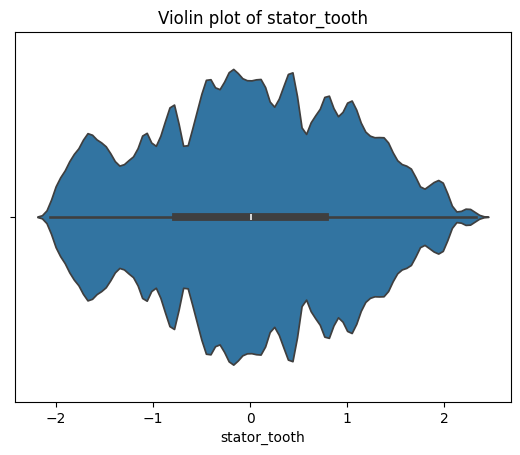

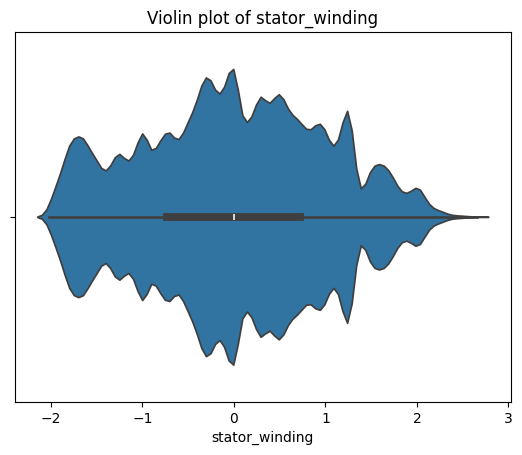

In [28]:
#Violin Plot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.violinplot(x=df[column])
    plt.title(f"Violin plot of {column}")



Strong Correlations (|correlation| > 0.7):
                ambient   coolant       u_d       u_q  motor_speed    torque  \
ambient             NaN       NaN       NaN       NaN          NaN       NaN   
coolant             NaN       NaN       NaN       NaN          NaN       NaN   
u_d                 NaN       NaN       NaN       NaN          NaN -0.821325   
u_q                 NaN       NaN       NaN       NaN     0.716897       NaN   
motor_speed         NaN       NaN       NaN  0.716897          NaN       NaN   
torque              NaN       NaN -0.821325       NaN          NaN       NaN   
i_d                 NaN       NaN       NaN       NaN    -0.722914       NaN   
i_q                 NaN       NaN -0.796586       NaN          NaN  0.996560   
pm                  NaN       NaN       NaN       NaN          NaN       NaN   
stator_yoke         NaN  0.874037       NaN       NaN          NaN       NaN   
stator_tooth        NaN       NaN       NaN       NaN          NaN       NaN

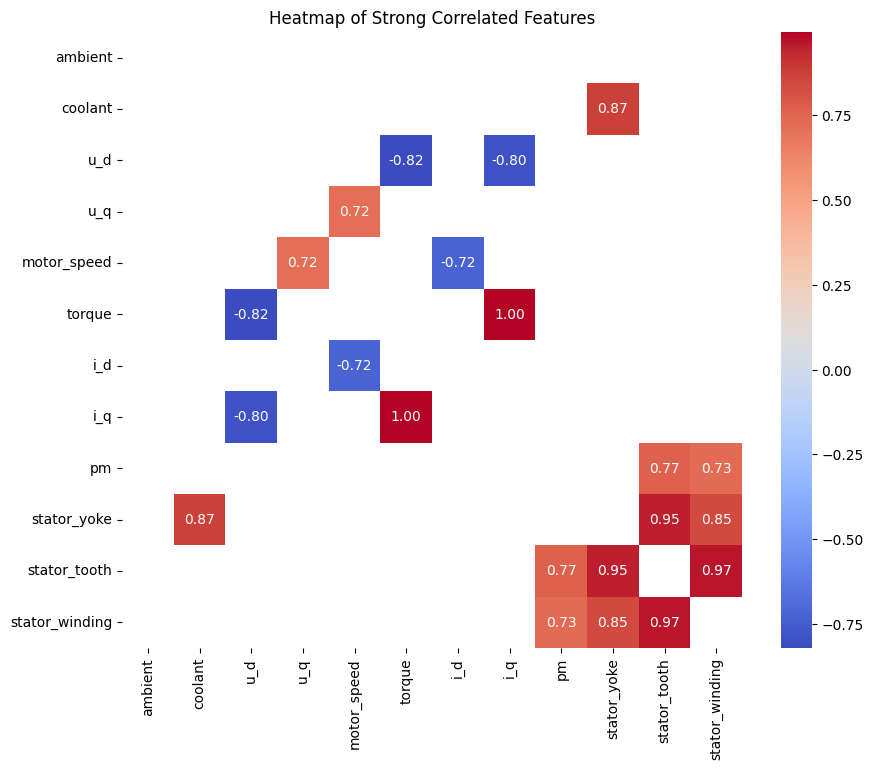

In [29]:
# Discuss potential implications of correlations
threshold = 0.7  # Define a strong correlation threshold
strong_correlations = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)]
print("\nStrong Correlations (|correlation| > 0.7):")
print(strong_correlations)

print("\n")
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Strong Correlated Features")
plt.show()


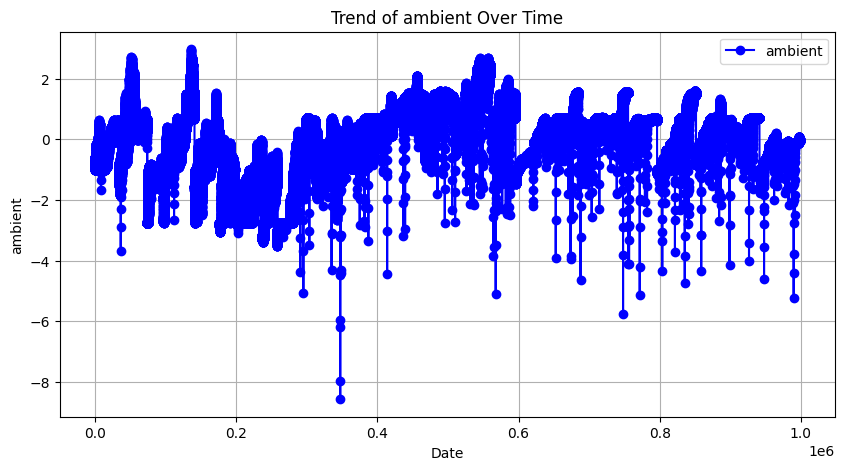

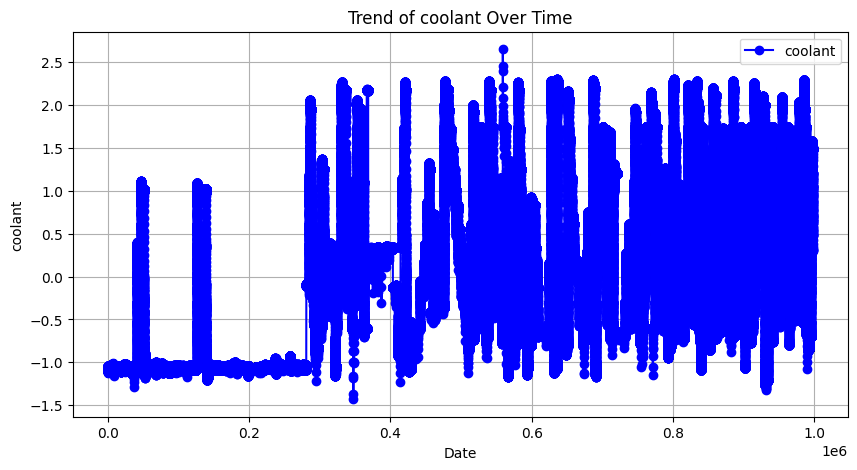

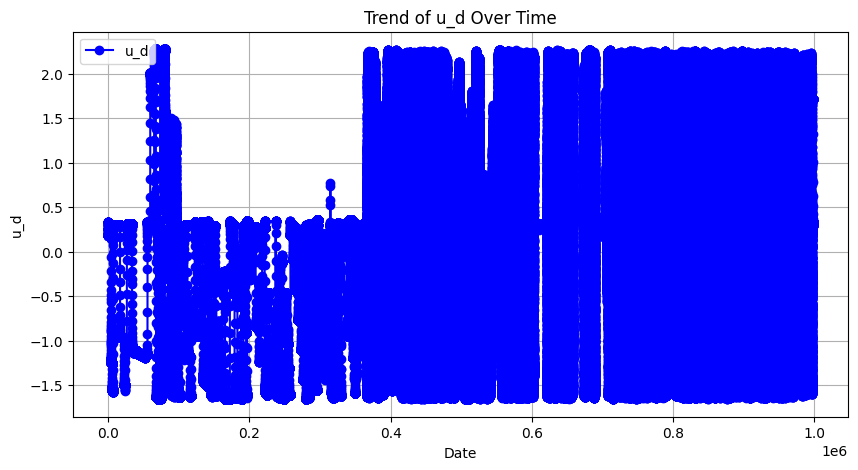

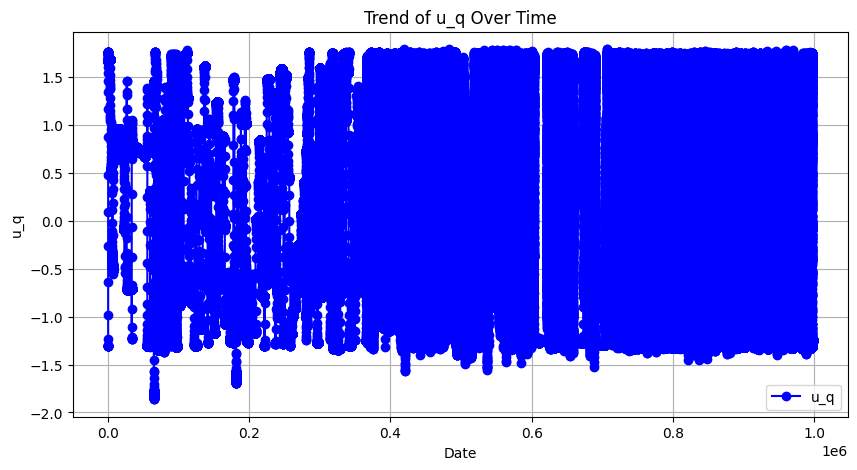

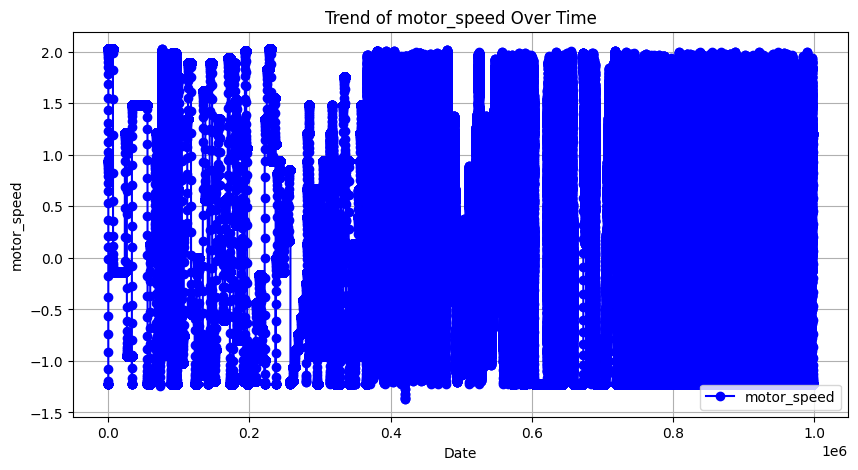

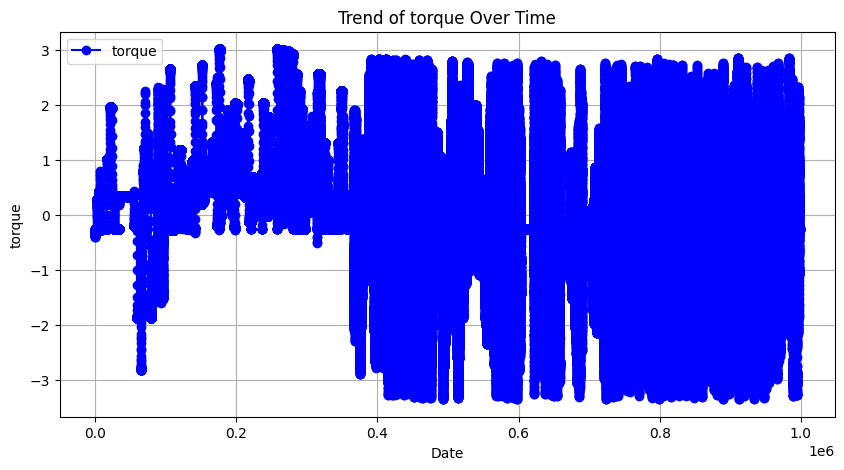

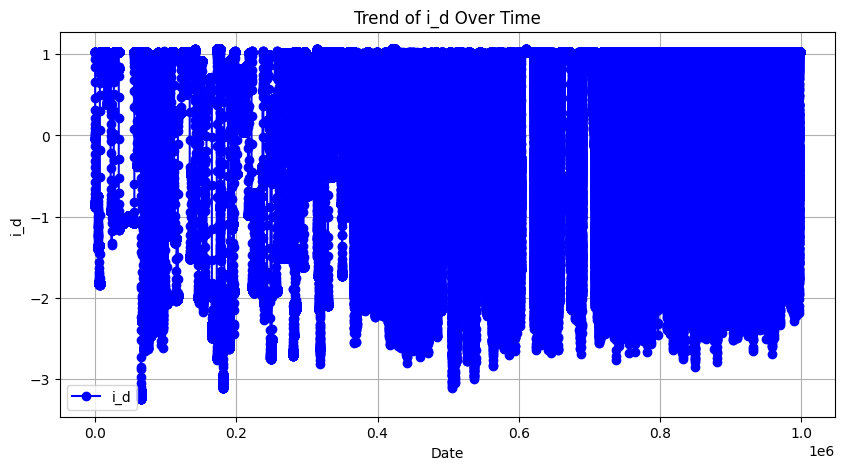

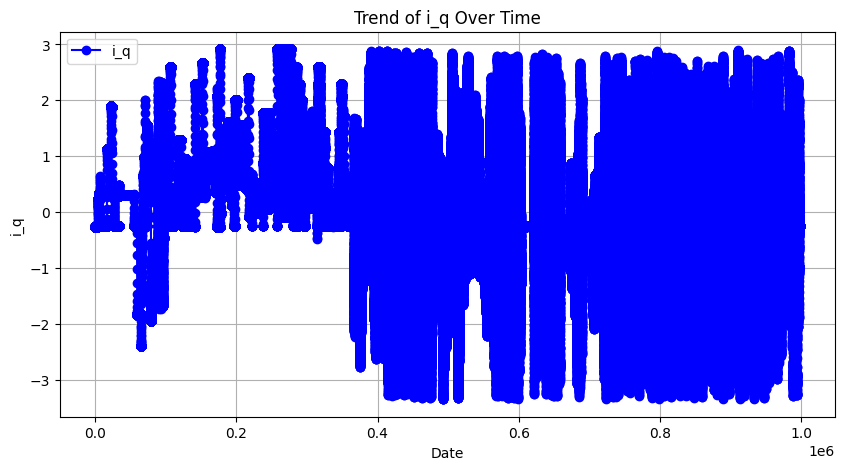

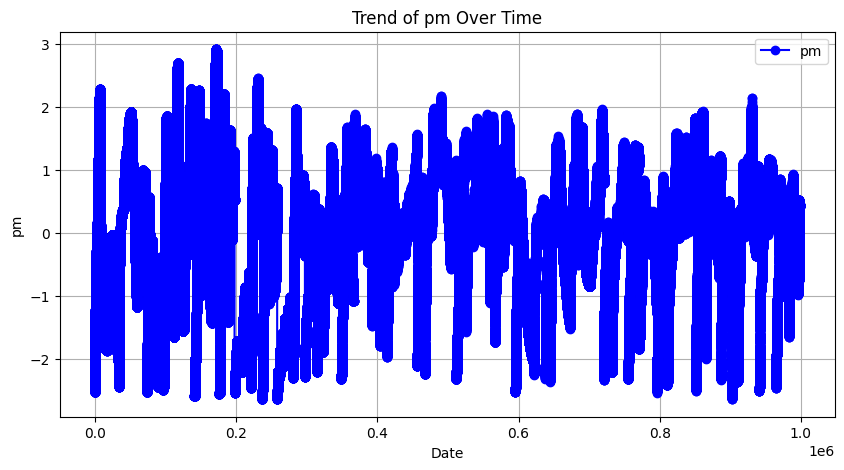

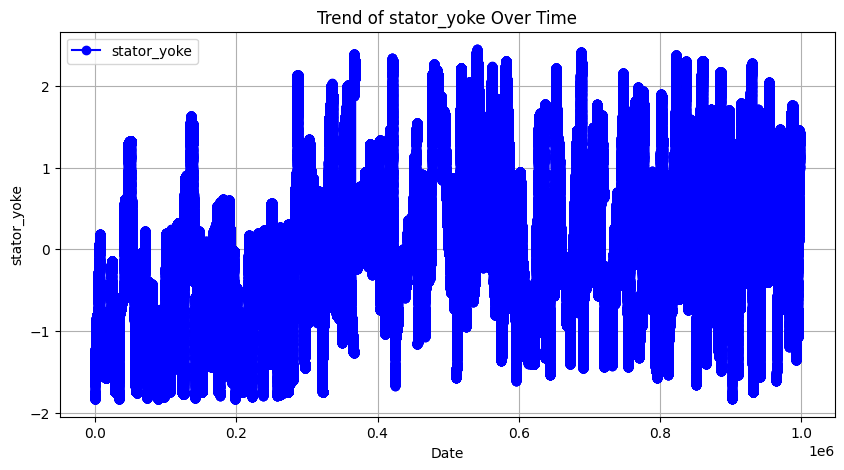

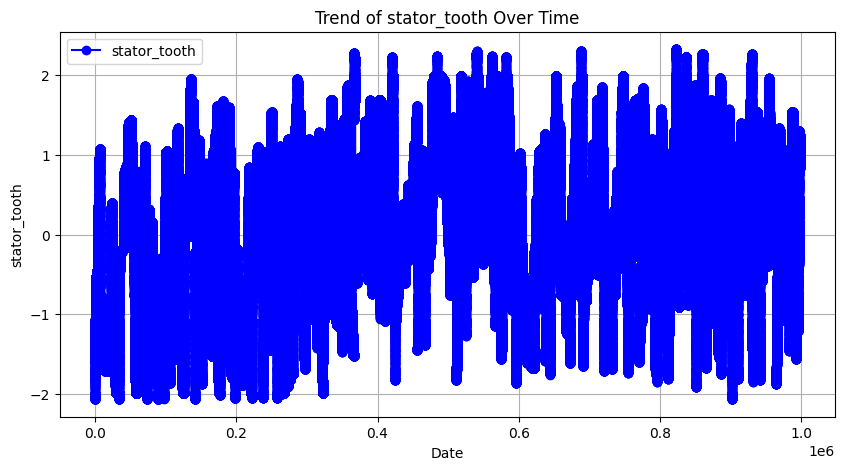

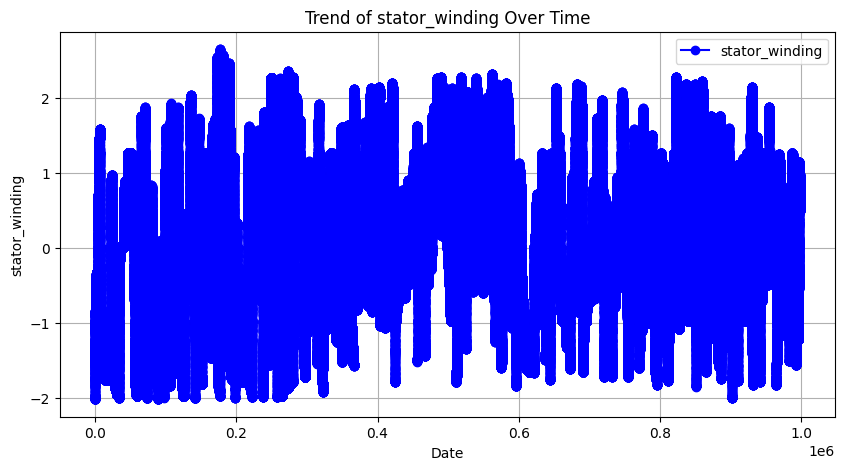

In [30]:
#Trend Analysis

numerical_cols = df.select_dtypes(include=['number']).columns
for column in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.plot(df[column], label=column, marker='o', color='b')
    plt.title(f'Trend of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


# Model Building

In [32]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 7.1 MB/s eta 0:00:00


In [33]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [34]:
# Define X (features) and y (target)
X = df.drop(columns=["motor_speed"])
y = df["motor_speed"]


In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Model 1: Random Forest ----------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [39]:
# Model 2: XGBoost ----------------
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [40]:
# Model 3: LightGBM ----------------
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 798456, number of used features: 11
[LightGBM] [Info] Start training from score -0.005461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [41]:
# Model 4: Neural Network (MLP) ----------------
# layers-Output Layer
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

y_pred_nn = nn_model.predict(X_test_scaled).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6238/6238 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [43]:
# Model Evaluation ----------------
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lgb, "LightGBM")
evaluate_model(y_test, y_pred_nn, "Neural Network")

Random Forest - R²: 0.9999, MAE: 0.0035, RMSE: 0.0112
XGBoost - R²: 0.9995, MAE: 0.0121, RMSE: 0.0234
LightGBM - R²: 0.9994, MAE: 0.0137, RMSE: 0.0247
Neural Network - R²: 0.9999, MAE: 0.0040, RMSE: 0.0096
